In [2]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Some image examples: 
105_1474896468.jpg


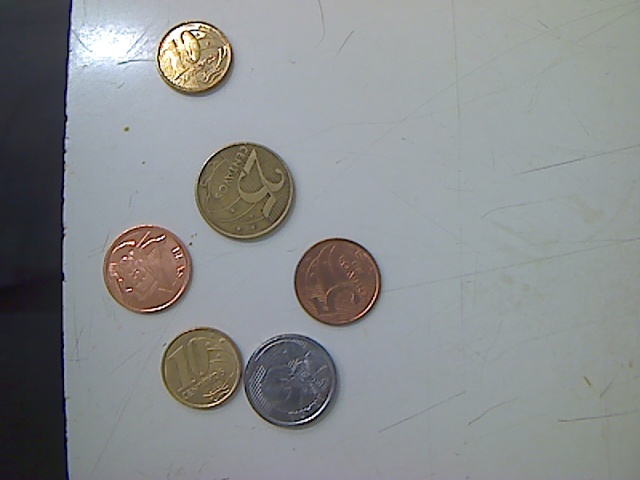

95_1473688806.jpg


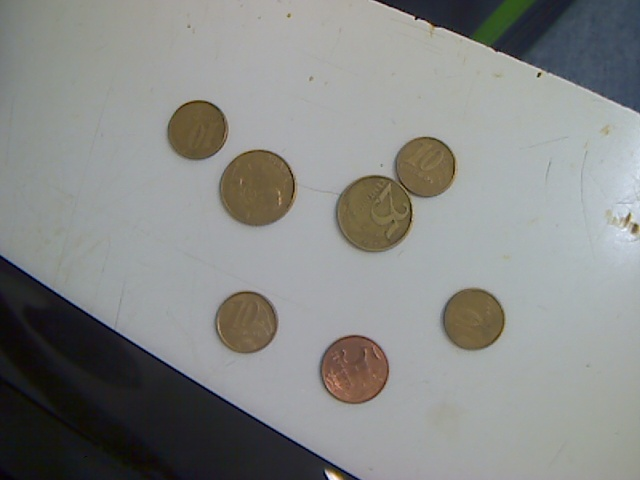

In [3]:
folder = "../data/deeplearning/all"
print("Some image examples: ")

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [4]:
from keras.preprocessing.image import ImageDataGenerator
def data_augmentation():
    datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
    
    datagen.fit(X_train)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    samples_per_epoch=len(X_train), nb_epoch=nb_epoch)
    pass

Using Theano backend.
ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.


In [5]:
def my_img_to_array(image_files):
    
    #Medidas originais 
    image_width = 640
    image_height = 480
    ratio = 4

    image_width = 160
    image_height = 120

    channels = 3
    nb_classes = 1

    dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                         dtype=np.float32)

    i = 0
    for _file in image_files:
        img = load_img(folder + "/" + _file)  # this is a PIL image
        img.thumbnail((image_width, image_height))
        #img = img.convert('L')
        # Transformando em Numpy Array
        x = img_to_array(img)  
        #print(x.shape)
        #x = x.reshape((1,) + x.shape)
        # Normalizando
        x = (x - 128.0) / 128.0
        dataset[i] = x
        i += 1
        if i % 100 == 0:
            print("%d images to array" % i)
    
    return dataset

In [6]:
train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))


from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#Medidas originais 
image_width = 640
image_height = 480
ratio = 4

image_width = image_width / ratio
image_height = image_height / ratio

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    #img = img.convert('L')
    # Transformando em Numpy Array
    x = img_to_array(img)  
    #print(x.shape)
    #x = x.reshape((1,) + x.shape)
    # Normalizando
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 100 == 0:
        print("%d images to array" % i)
    

Files in train_files: 1159
100 images to array
200 images to array
300 images to array
400 images to array
500 images to array
600 images to array
700 images to array
800 images to array
900 images to array
1000 images to array
1100 images to array


In [7]:
from sklearn.cross_validation import train_test_split
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.1, random_state=33)

In [30]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(Convolution2D(64, 3, 3, input_shape=(3, image_height, image_width)))
#model.add(Convolution2D(32, 3, 3, input_shape=(3, image_height, image_width)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
#model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3))
#model.add(Convolution2D(8, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3))
#model.add(Convolution2D(8, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(16, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('linear'))
model.add(Dropout(0.5))
model.add(Dense(1))

### Carregando pesos iniciais vindo de treinamento anterior
#model.load_weights("warm_start.h5")
#model.load_weights("warm_start2.h5")
model.load_weights("last_model.h5")


sgd = SGD(lr=0.01, decay=1e-7, momentum=.9)
    
#model.compile(loss='mse',
#              metrics=['accuracy'], optimizer='rmsprop')

model.compile(loss='mse', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')


model.fit(X_train, y_train, 
          nb_epoch=10, batch_size=50,  
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])
   # sleep(60)

#model.load_weights(filename)

Train on 1043 samples, validate on 116 samples
Epoch 1/10
1043/1043 [==============================] - 208s - loss: 473.0645 - val_loss: 1416.6349
Epoch 2/10
1043/1043 [==============================] - 304s - loss: 517.4437 - val_loss: 1204.9993
Epoch 3/10
1043/1043 [==============================] - 316s - loss: 398.7589 - val_loss: 1219.0909
Epoch 4/10
1043/1043 [==============================] - 428s - loss: 450.3456 - val_loss: 1171.6366
Epoch 5/10
1043/1043 [==============================] - 341s - loss: 438.7321 - val_loss: 1134.1656
Epoch 6/10
1043/1043 [==============================] - 420s - loss: 430.2012 - val_loss: 1200.8902
Epoch 7/10
1043/1043 [==============================] - 259s - loss: 465.9849 - val_loss: 1351.7080
Epoch 8/10
1043/1043 [==============================] - 320s - loss: 414.3080 - val_loss: 1146.8943
Epoch 9/10
1043/1043 [==============================] - 377s - loss: 465.9467 - val_loss: 1217.6155


In [31]:
### Salvando os pesos
model.save_weights('last_model.h5',overwrite=True)

(faz tempo que esse link tá aqui, nem lembro mais se tinha algo importante)

http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

### Resultados:
Imagem: normalizada, 160x120
Três épocas    
loss: 10092.9179 - val_loss: 12747.4773    
30 épocas  
loss: 17.9679 - val_loss: 3657.0876 

loss: 1370.2057 - val_loss: 3124.1294 

loss: 1297.7805 - val_loss: 2500.0276

loss: 516.1915 - val_loss: 1187.3157

loss: 414.3080 - val_loss: 1146.8943

In [32]:
start = time()
predictions = model.predict(X_test)
print("Tempo médio de previsão: {0:.2f}s".format((time() - start)/len(X_test)))

Tempo médio de previsão: 0.05s


In [33]:
print("{0:5} {1:10} {2:8}".format("True", "Predicted", "Error"))
for i in range(len(predictions[:10])):
    print("{0:5} {1:10} {2:8}".format(y_test[i], int(predictions[i]), abs(y_test[i] - int(predictions[i]))))
          
#print predictions[:5].transpose()
#print y_test[:5]

True  Predicted  Error   
  125        100       25
  110         99       11
   30         39        9
   45         85       40
  120        140       20
  400        389       11
   15         58       43
  305        228       77
    0         22       22
    5          4        1


In [34]:
### Fazendo com que previsoes sejam multiplos de 5
def closer_multiple(x, mult):
    value = mult * int(x / multi)
    if (x % multi) > multi/2.0:
        value += multi
    return value

multi = 5
predictions = [closer_multiple(x, multi) for x in predictions]

print("{0:5} {1:10} {2:8}".format("True", "Predicted", "Error"))
for i in range(len(predictions[:10])):
    print("{0:5} {1:10} {2:8}".format(y_test[i], int(predictions[i]), abs(y_test[i] - int(predictions[i]))))

True  Predicted  Error   
  125        100       25
  110        100       10
   30         40       10
   45         85       40
  120        140       20
  400        390       10
   15         60       45
  305        230       75
    0         20       20
    5          5        0


### Prevendo valores em imagens novas
Vamos usar uma pasta com o nome "unseen" para colocar imagens para teste.

Previsao: 100. Valor real: 270


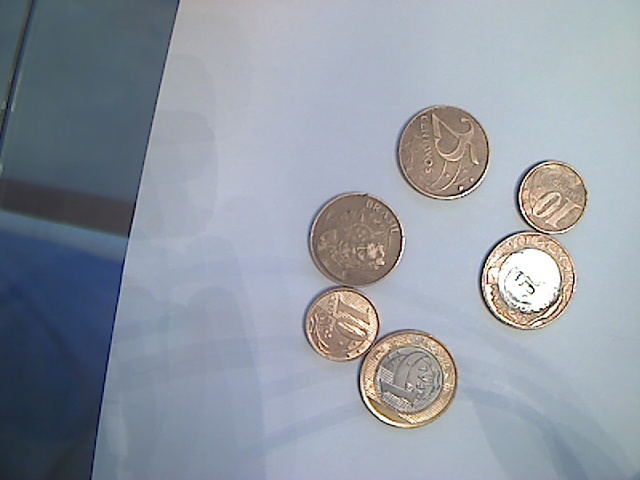

Previsao: 100. Valor real: 220


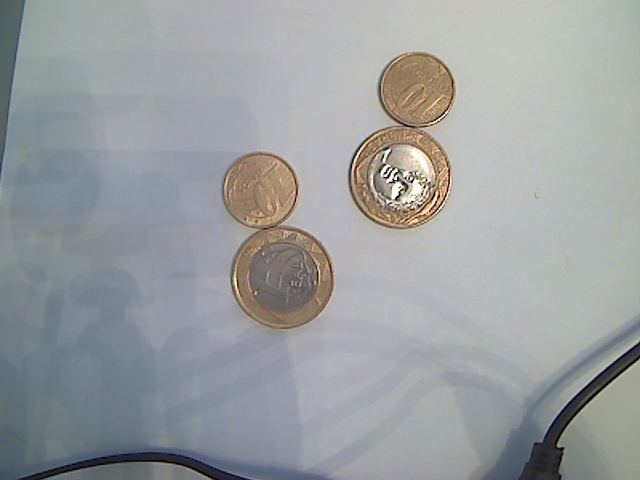

Previsao: 40. Valor real: 270


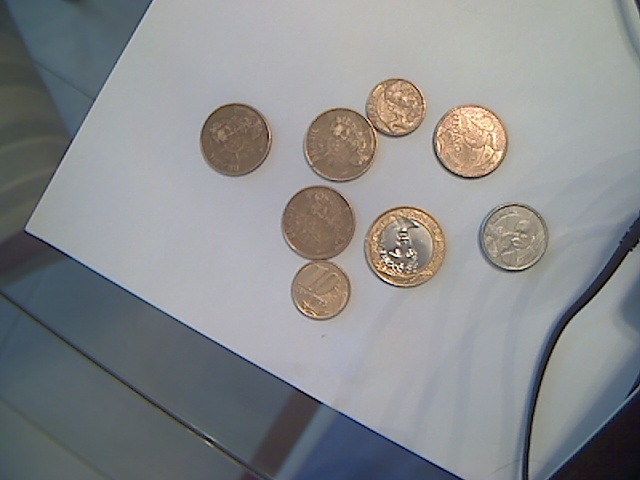

Previsao: 85. Valor real: 160


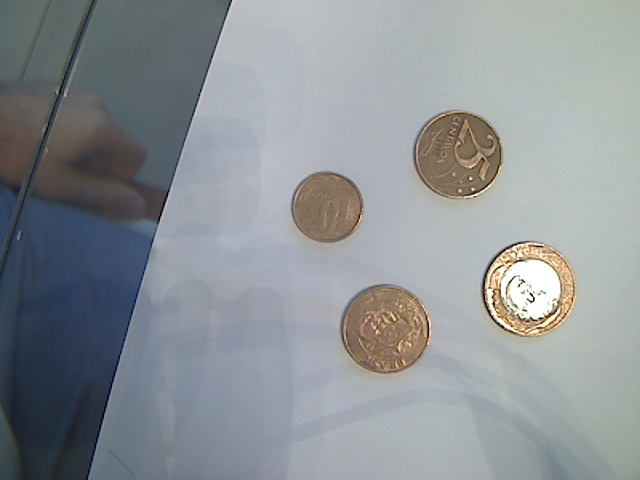

Previsao: 140. Valor real: 270


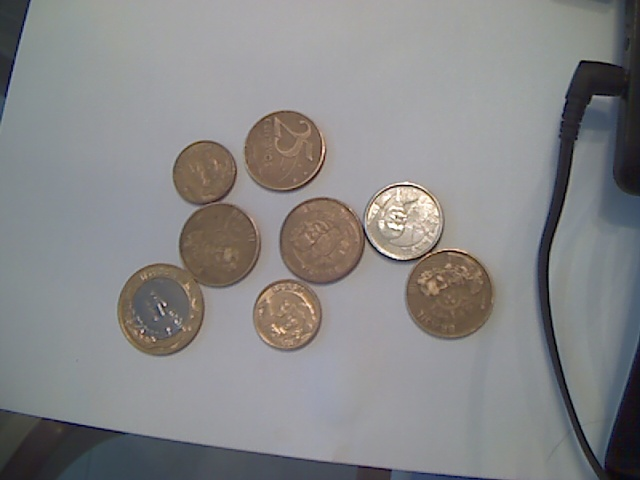

Previsao: 390. Valor real: 270


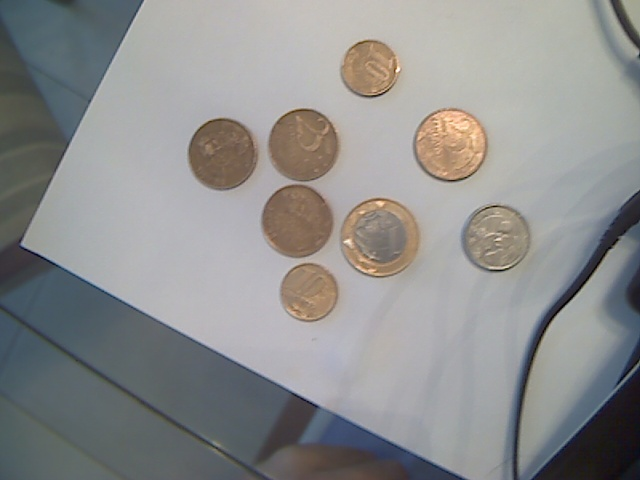

Previsao: 60. Valor real: 110


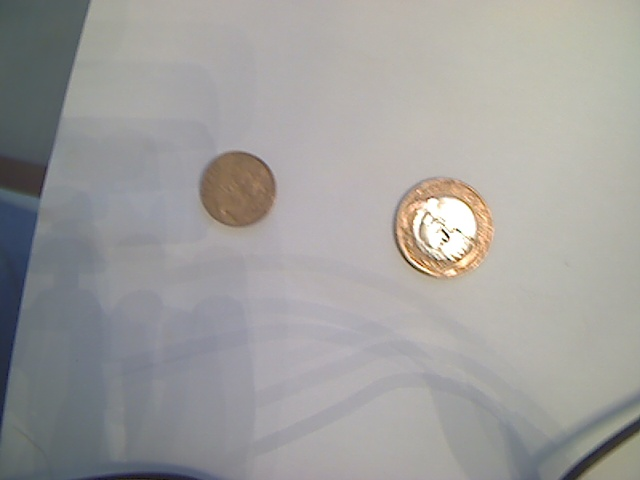

Previsao: 230. Valor real: 245


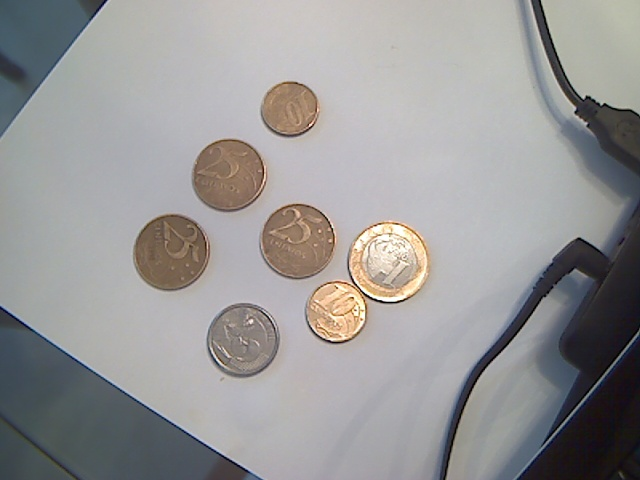

Previsao: 20. Valor real: 270


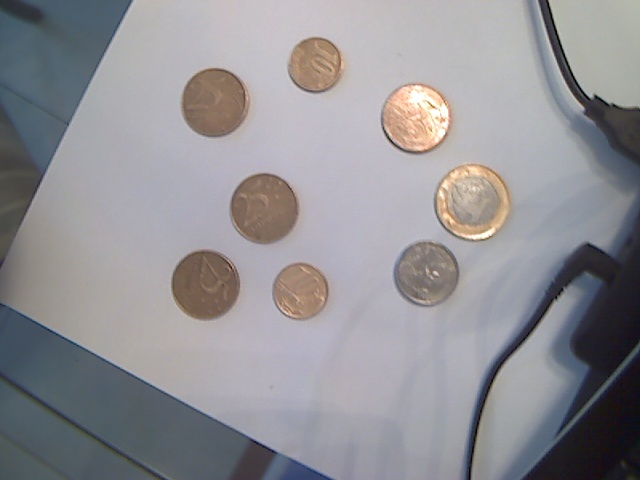

Previsao: 5. Valor real: 160


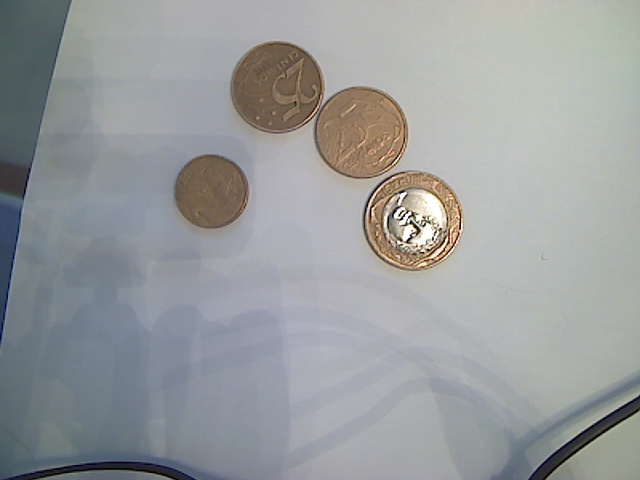

In [35]:
folder = "../data/deeplearning/unseen"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

data = my_img_to_array(onlyfiles)
predictions = model.predict(X_test)
predictions = [closer_multiple(x, multi) for x in predictions]

for i in range(len(onlyfiles[:10])):
    label_in_file = onlyfiles[i].find("_")
    value = int(onlyfiles[i][0:label_in_file])
    print("Previsao: {0}. Valor real: {1}".format(predictions[i], value))
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], height=240, width=320))

### a

In [22]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(input_dim = 1000, output_dim = 1000))
model.add(Activation('sigmoid'))
model.add(Dense(input_dim = 500, output_dim = 1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train, nb_epoch=10, batch_size=5,  validation_data=(X_test, y_test), verbose=1)

Train on 296 samples, validate on 74 samples
Epoch 1/10
296/296 [==============================] - 127s - loss: 10421.7858 - val_loss: 10072.2231
Epoch 2/10
296/296 [==============================] - 179s - loss: 9171.9969 - val_loss: 9343.8601
Epoch 3/10
296/296 [==============================] - 215s - loss: 8634.6115 - val_loss: 8903.8012
Epoch 4/10
296/296 [==============================] - 203s - loss: 8237.8482 - val_loss: 8518.5890
Epoch 5/10
296/296 [==============================] - 219s - loss: 7866.0203 - val_loss: 8176.0744
Epoch 6/10
130/296 [============>.................] - ETA: 116s - loss: 10180.5608

KeyboardInterrupt: 